# Regression

The dataset comprises various attributes related to student performance, including hours of study, practice, teamwork involvement, midterm exam scores, final exam scores, overall scores, and corresponding grades. It offers insights into the factors influencing academic achievement and provides a basis for analyzing the correlations between study habits, collaborative activities, and examination outcomes.

In [68]:
# import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# your code here to read the file
grades_df = pd.read_csv('Student_Grades.csv')
grades_df

,Hours,Practice,TeamWork,MidTerm,FinalExam,Scores,Grade
0,2.5,0.5,0.0,2.0,2.3,21.0,C
1,5.1,1.5,0.5,4.0,4.9,47.0,B
2,3.2,1.0,0.5,3.0,2.9,27.0,C
3,8.5,3.7,1.2,7.0,7.7,75.0,A
4,3.5,1.2,0.3,3.0,3.2,30.0,C
5,1.5,0.2,0.0,2.0,2.2,20.0,C
6,9.2,4.8,3.0,8.0,9.0,88.0,A
7,5.5,3.2,2.0,6.0,6.2,60.0,B
8,8.3,5.1,3.5,8.0,8.3,81.0,A
9,2.7,1.5,0.0,3.0,2.7,25.0,C


replace the NaN values in the csv files with new values

In [59]:
df = grades_df.replace(np.nan, 'some value')    # replace all NaN values with 'some value' and write to new data frame df
df

# to replace inplace (in the file that is) without reassignment
# grades_df.replace(np.nan, 'some value', inplace=True)
# grades_df.to_csv('Student_Grades.csv', index = False) # close the file before writing to it
# grades_df



,Hours,Practice,TeamWork,MidTerm,FinalExam,Scores,Grade,Midterm
0,2.5,0.5,0.0,2.0,2.3,21.0,C,some value
1,5.1,1.5,0.5,4.0,4.9,47.0,B,some value
2,3.2,1.0,0.5,3.0,2.9,27.0,C,some value
3,8.5,3.7,1.2,7.0,7.7,75.0,A,some value
4,3.5,1.2,0.3,3.0,3.2,30.0,C,some value
...,...,...,...,...,...,...,...,...
90,5.7,some value,some value,9.3,4.0,10.8,C,some value
91,1.5,some value,some value,2.5,2.4,29.1,F,some value
92,9.9,some value,some value,5.0,9.2,58.8,C,some value
93,0.9,some value,some value,10.0,6.0,15.5,C,some value


- draw a scatter plot of hours studied across the final score using `pandas`
- draw a scatter plot of hours studied across the final score using `matplotlib`

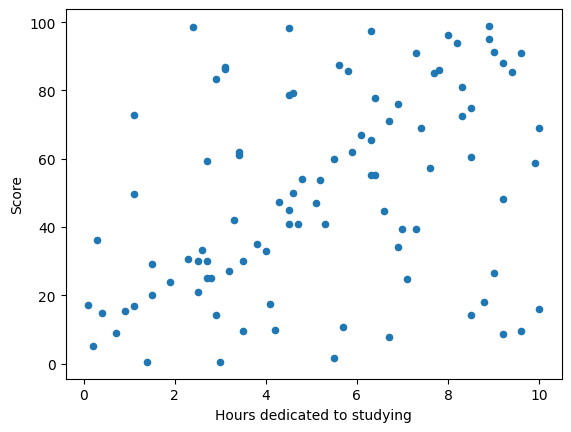

In [41]:
# clean out the "some value" from .csv file and set it back to NaN before plotting
# Run All cells before continuing

# scatter plot with pandas
grades_df.plot(kind = 'scatter', x = 'Hours', y = 'Scores')


# scatter plot with matplotlib
grades_df = grades_df.dropna()
ypoints = grades_df['Scores'].to_numpy()
xpoints = grades_df['Hours'].to_numpy()
plt.scatter(xpoints, ypoints, s = 5)
plt.xlabel('Hours dedicated to studying')   # set label on x-axis
plt.ylabel('Score')                         # set label on y-axis
plt.show()


### calling the string function `contains` on a column

does a column of strings contain a given value? 

In [42]:
grades_df['Grade'].str.contains('A')    # from str class can use contains method on the column 'Grade'
grades_df[grades_df['Grade'].str.contains('A')]   # view the dataframe after filter is applied

,Hours,Practice,TeamWork,MidTerm,FinalExam,Scores,Grade,Midterm


### get min, max, mean, etc on a column of numerical values and/or use describe()

In [43]:
grades_df['MidTerm'].min()
grades_df['FinalExam'].max()
grades_df['FinalExam'].mean().round(2)
grades_df['MidTerm'].describe()

AttributeError: 'float' object has no attribute 'round'

- change numerical values to strings
- set index to 'Hours'
- slice
- rename columns
- rename index columsn

In [44]:
# change numerical values of hours to strings to do slicing
# grades_df['Hours'] = grades_df['Hours'].astype(str)           # uncomment this if you would like to change values of 'Hours' to string

# create new data frame and set Hours as the new index
df = grades_df.set_index('Hours').sort_values('Hours')  # should have indices sorted for slicing to work
df.loc[1.1]
df.loc[1.1:5.5]

# rename column
df2 = grades_df.rename(columns = {'Hours': 'Hours studied'})
df2

# rename index column
df2 = df.rename_axis('Hours studied')   # index in df is 'Hours' (see line 5)
df2


,Practice,TeamWork,MidTerm,FinalExam,Scores,Grade
Hours studied,,,,,,
1.1,1.1,0.0,2.0,1.9,17.0,C
1.5,0.2,0.0,2.0,2.2,20.0,C
1.9,0.9,0.5,2.0,2.6,24.0,C
2.5,0.5,0.0,2.0,2.3,21.0,C
2.5,1.6,1.0,3.0,3.2,30.0,C
2.7,3.0,1.2,3.0,3.2,30.0,C
2.7,1.5,0.0,3.0,2.7,25.0,C
3.2,1.0,0.5,3.0,2.9,27.0,C
3.3,2.2,1.1,4.0,4.4,42.0,B


### `loc` and `iloc`
`iloc` is only used with integer indices

In [45]:
# get index of rows where 'Hours' column is equal to 1.1
lst = grades_df.index[grades_df['Hours'] == 1.1].tolist()   # get indices of rows where 'Hours' is 1.1 and put them in a list lst
index = lst[0]

lst = grades_df.index[grades_df['Hours'] == 2.5].tolist()
lst

grades_df.iloc[index]           # access information at row index
grades_df.iloc[index:index+6]

,Hours,Practice,TeamWork,MidTerm,FinalExam,Scores,Grade
14,1.1,1.1,0.0,2.0,1.9,17.0,C
15,8.9,6.2,6.0,9.0,9.7,95.0,A
16,2.5,1.6,1.0,3.0,3.2,30.0,C
17,1.9,0.9,0.5,2.0,2.6,24.0,C
18,6.1,2.0,3.2,6.0,6.9,67.0,A
19,7.4,2.5,3.0,7.0,7.1,69.0,A


### `at`, `iat` and slicing
use `iat` with only integer indices

In [46]:
df.loc[1.1:2, ['MidTerm', 'FinalExam', 'Scores']]   # get all rows from 1.1 to 2 and only columns MidTerm, FinalExam and Scores
grades_df.iloc[[0,5], 0:4]      # get only rows at index 0 and 5 with columns at index 0 to 3 inclusive

df.at[1.1, 'FinalExam'] # get value at row designated by 1.1 and column 'FinalExam'
grades_df.iat[2, 4]     # get value at row index 2 and column index 4 using iat

np.float64(2.9)

Write snippet of Python code that loops through the **Scores** column and determines the minimum value in that column.  

In [47]:
# Your code here

# grades_df['Scores'].min()

min = 1000000

for i in range(len(grades_df['Scores'])):
    if grades_df['Scores'].iloc[i] < min:
        min = grades_df['Scores'].iloc[i]
print(min)

17.0


# Regression Fit

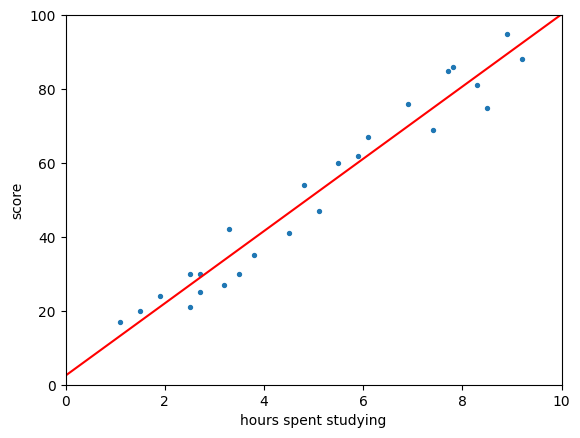

slope is: 9.78
intercept is: 2.48


In [ ]:
# plt.figure(figsize=(5, 5))
plt.scatter(xpoints, ypoints, s = 8)
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.xlabel('hours spent studying')
plt.ylabel('score')

#Create polynomial function for line of best fit

# coeff = np.polyfit(xpoints, ypoints, deg = 1)
# best_fit_function = np.poly1d(coeff)
# plt.plot(xpoints, best_fit_function(xpoints), label = 'Regression Fit', color = 'red')
# plt.legend()
# plt.show()
# print(coeff)



# method 2 for line of best fit
b, a = np.polyfit(xpoints, ypoints, deg = 1)    # b is slope, a is the intercept
xseq = np.linspace(0, 10)   # try (5, 9) to get only a portion of the fit
plt.plot(xseq, a + b * xseq, c = 'red') # a + b*xseq is the equation of line of best fit 
plt.show()

print(f'slope is: {b:.2f}')
print(f'intercept is: {a:.2f}')

# Homework!

### add new data to the file `Student_Grades.csv`
- generate random 10 numbers for hours in the range of (0, 10)
- generate random 10 numbers for `MidTerm` and `FinalExam` in the range of (0, 10]
- generate random 10 numbers for `Scores` in the range of (0, 100]
- genreate random 10 grades for `Grade` in the range of [A, B, C, D, F].  Based on the results in the current file, deduce which of the newly generated Scores aligns to what grade
- write your results to the `Student_Grades.csv' file, updating the current file.  

In [69]:
# Your code here

hours = np.random.uniform(0, 10, size =10).round(1)

midterm_exam = np.random.uniform(0, 10, size =10).round(1)

final_exam = np.random.uniform(0, 10, size =10).round(1)

final_scores = np.random.uniform(0, 100, size =10).round(1)

final_grades = np.random.choice(['A', 'B', 'C', 'D', 'E', 'F'], size = 10)

new_df = pd.DataFrame({
    'Hours': hours,
    'MidTerm': midterm_exam,
    'FinalExam': final_exam,
    'Scores': final_scores,
    'Grade': final_grades
})

grades_df = pd.concat([grades_df, new_df], ignore_index = True)

grades_df.to_csv('Student_Grades.csv', index = False)

grades_df



,Hours,Practice,TeamWork,MidTerm,FinalExam,Scores,Grade,MidTerm
0,2.5,0.5,0.0,2.0,2.3,21.0,C,NaN
1,5.1,1.5,0.5,4.0,4.9,47.0,B,NaN
2,3.2,1.0,0.5,3.0,2.9,27.0,C,NaN
3,8.5,3.7,1.2,7.0,7.7,75.0,A,NaN
4,3.5,1.2,0.3,3.0,3.2,30.0,C,NaN
5,1.5,0.2,0.0,2.0,2.2,20.0,C,NaN
6,9.2,4.8,3.0,8.0,9.0,88.0,A,NaN
7,5.5,3.2,2.0,6.0,6.2,60.0,B,NaN
8,8.3,5.1,3.5,8.0,8.3,81.0,A,NaN
9,2.7,1.5,0.0,3.0,2.7,25.0,C,NaN
